### Setup

The following cells import and organize the dataset into a pandas DataFrame.

In [1]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Import the dataset from the cleaned csv file
survey_tidy = pd.read_csv('dataset/news_trust_data__clean.csv')

# Create a shorter DataFrame without the NewsSource and Source Trust columns (i.e. no duplicate RespondentID entries for different NewsSources)
survey_short = survey_tidy[survey_tidy['NewsSource'] == 'NYT'].drop(columns=['NewsSource', 'SourceTrust'])

# Check shape and head of datasets
print(survey_short.shape)
survey_short.head()

(1019, 9)


,RespondentID,Political_View,General_Trust,Pay_For_News,Data_Access,Trump_Approval,Age,Gender,Income
0,6176264298,Moderate,Fair Amount,No,No change,Strongly disapprove,30-44,Male,"10,000-24,999"
1,6176263960,Moderate,Fair Amount,No,Increase Trust,Somewhat disapprove,18-29,Female,"0-9,999"
2,6176258621,Liberal,Fair Amount,Yes,Increase Trust,Strongly disapprove,30-44,Male,"125,000-149,999"
3,6176257082,Liberal,Fair Amount,No,Increase Trust,Strongly disapprove,18-29,Male,"125,000-149,999"
4,6176256111,Liberal,Fair Amount,Yes,No change,Strongly disapprove,30-44,Male,"10,000-24,999"


In [2]:
# Check the tidy dataset
print(survey_tidy.shape)
survey_tidy.head()

(11209, 11)


,RespondentID,Political_View,General_Trust,Pay_For_News,Data_Access,Trump_Approval,Age,Gender,Income,NewsSource,SourceTrust
0,6176264298,Moderate,Fair Amount,No,No change,Strongly disapprove,30-44,Male,"10,000-24,999",NYT,1
1,6176263960,Moderate,Fair Amount,No,Increase Trust,Somewhat disapprove,18-29,Female,"0-9,999",NYT,1
2,6176258621,Liberal,Fair Amount,Yes,Increase Trust,Strongly disapprove,30-44,Male,"125,000-149,999",NYT,1
3,6176257082,Liberal,Fair Amount,No,Increase Trust,Strongly disapprove,18-29,Male,"125,000-149,999",NYT,0
4,6176256111,Liberal,Fair Amount,Yes,No change,Strongly disapprove,30-44,Male,"10,000-24,999",NYT,1


In [4]:
# Preferred order of categories
order = {}
order['Data_Access'] = ['Decrease Trust', 'No change', 'Increase Trust']
order['General_Trust'] = ['None at all', 'Not very much', 'Fair Amount', 'Great Amount']
order['Income'] = ['0-9,999', '10,000-24,999', '25,000-49,999', '50,000-74,999', '75,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-174,999', '175,000-199,999', '200,000+', 'Prefer not to answer']
order['Trump_Approval'] = ['Strongly disapprove', 'Somewhat disapprove', 'Somewhat approve', 'Strongly approve']
order['Political_View'] = ['Very Liberal', 'Liberal', 'Moderate', 'Conservative', 'Very Conservative']

# Set order for specified categories
for c in order.keys():
    survey_short[c] = pd.Categorical(survey_short[c], order[c])

# Check dtypes
#survey.info()

## Scratch

<AxesSubplot:xlabel='Pay_For_News', ylabel='Political_View'>

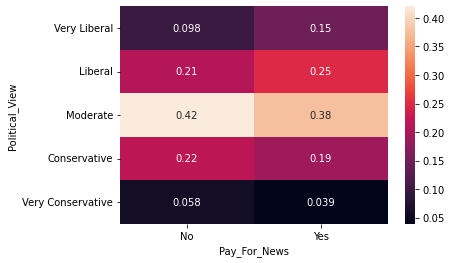

In [11]:
sns.heatmap(pd.crosstab(survey_short['Political_View'], survey_short['Pay_For_News'], normalize='columns'), annot=True)

In [5]:
# Trump Approval, relative to each political leaning
approval_heat = sns.heatmap(pd.crosstab(survey['political_lean'], survey['Trump_Approval'], normalize='index'), cmap='GnBu')
approval_heat.set(title='Trump Approval by Political Leaning', xlabel='Approval relative to others of the same political leaning', ylabel='Political Leaning')
plt.xticks(rotation=45)
approval_heat;

NameError: name 'survey' is not defined

In [6]:
pd.crosstab(survey_tidy['political_lean'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')

KeyError: 'political_lean'

In [7]:
pd.crosstab(survey_tidy['general_trust'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')

KeyError: 'general_trust'

In [8]:
#plt.figure(figsize=(15,8))
income_plt = sns.countplot(x="Income", data=survey)
income_plt.set(title='Income', xlabel='Income Bracket', ylabel='Respondents')
plt.xticks(rotation=45)
income_plt;

NameError: name 'survey' is not defined

In [ ]:
others = pd.read_csv('dataset/all_responses_coded.csv', index_col=0)['A21']
others.value_counts()

In [ ]:
others = [e.lower().strip("'\".") for e in others]

In [ ]:
sources = ['0', 'none', 'npr', 'msnbc', 'pbs', 'vice', 'oann', 'bbc', 'al jazeera', 'al-jazeera', 'cbc', 'reuters', 'local']
count = dict.fromkeys(sources, 0)
#count = {'0':0, 'none':0, 'npr':0, 'msnbc':0, 'pbs':0, 'vice':0, 'oann':0, 'bbc':0}
for e in others:
    for s in sources:
        if s in e:
            count[s] += 1
print(count)

In [ ]:
bfn = survey_tidy[(survey_tidy['NewsSource'] == 'FoxNews') & (survey_tidy['SourceTrust'] == 1)]
#bfn[['Political_View', 'Gender', 'Age']].value_counts()
bfn['Gender'].value_counts()